In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import os
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

In [2]:
# we read the data
df = pd.read_csv('result4plot.csv')

# dataset defined by noise type
cyrillic = df.loc[df['noise_type'].str.contains('cyrillic')] # all noise = cyrillic
cyrillic.name = 'cyrillic'
greek = df.loc[df['noise_type'].str.contains('greek')]
greek.name  = 'greek'
leetspeak = df.loc[df['noise_type'].str.contains('leetspeak')]
leetspeak.name  = 'leetspeak'

# dataset defined by font
noto = df.loc[df['font'].str.contains('noto')] # all font = noto
noto.name = 'noto_sans'
typographer = df.loc[df['font'].str.contains('typographer')]
typographer.name = 'typographer'
turok = df.loc[df['font'].str.contains('turok')]
turok.name = 'turok'
mandatory = df.loc[df['font'].str.contains('mandatory')]
mandatory.name = 'mandatory'

# dataset defined by noise level
noiselev0 = df.loc[df['noise_level'] == 0.0] # all noise level 0
noiselev1 = df.loc[df['noise_level'] == 0.1] 
noiselev2 = df.loc[df['noise_level'] == 0.2]
noiselev3 = df.loc[df['noise_level'] == 0.3]
noiselev4 = df.loc[df['noise_level'] == 0.4]
noiselev5 = df.loc[df['noise_level'] == 0.5]
len(df)


64

In [3]:
leetspeak

,font,noise_type,noise_level,accuracy
0,noto,"cyrillic, greek, leetspeak",0.0,99.30
11,noto,leetspeak,0.1,80.05
12,noto,leetspeak,0.2,63.56
13,noto,leetspeak,0.3,50.70
14,noto,leetspeak,0.4,38.54
15,noto,leetspeak,0.5,29.33
16,typographer,"cyrillic, greek, leetspeak",0.0,96.76
27,typographer,leetspeak,0.1,68.11
28,typographer,leetspeak,0.2,48.03
29,typographer,leetspeak,0.3,32.35


In [4]:
mandatory

,font,noise_type,noise_level,accuracy
48,mandatory,"cyrillic, greek, leetspeak",0.0,98.56
49,mandatory,cyrillic,0.1,85.26
50,mandatory,cyrillic,0.2,70.87
51,mandatory,cyrillic,0.3,57.66
52,mandatory,cyrillic,0.4,44.42
53,mandatory,cyrillic,0.5,33.97
54,mandatory,greek,0.1,82.92
55,mandatory,greek,0.2,66.40
56,mandatory,greek,0.3,51.73
57,mandatory,greek,0.4,38.06


In [5]:
noiselev0

,font,noise_type,noise_level,accuracy
0,noto,"cyrillic, greek, leetspeak",0.0,99.30
16,typographer,"cyrillic, greek, leetspeak",0.0,96.76
32,turok,"cyrillic, greek, leetspeak",0.0,98.95
48,mandatory,"cyrillic, greek, leetspeak",0.0,98.56


In [6]:
noiselev1

,font,noise_type,noise_level,accuracy
1,noto,cyrillic,0.1,93.90
6,noto,greek,0.1,88.78
11,noto,leetspeak,0.1,80.05
17,typographer,cyrillic,0.1,73.18
22,typographer,greek,0.1,70.95
27,typographer,leetspeak,0.1,68.11
33,turok,cyrillic,0.1,72.59
38,turok,greek,0.1,68.85
43,turok,leetspeak,0.1,90.09
49,mandatory,cyrillic,0.1,85.26


# Visualizing data

### noise_type fixed

In [7]:
def plot_noise_type_fixed(dataset):
    g = sns.relplot(
        x='noise_level', y='accuracy', data=dataset,
        hue='font', kind='line', markers=True,
        err_style='bars', style='font', linewidth=3,
        markersize=10, err_kws={'elinewidth': 4}
    )
    g.set_ylabels('Accuracy')
    g.set_xlabels('Noise Level')
    g.set(title='Fixed noise type:'+ dataset.name)

    # Save the plot to the specified file path
    g.savefig("./plots/noise_type_fixed/" + dataset.name + ".jpg")
    plt.close('all')
#     # Show the plot
#     plt.show()

In [8]:
plot_noise_type_fixed(cyrillic)
plot_noise_type_fixed(greek)
plot_noise_type_fixed(leetspeak)

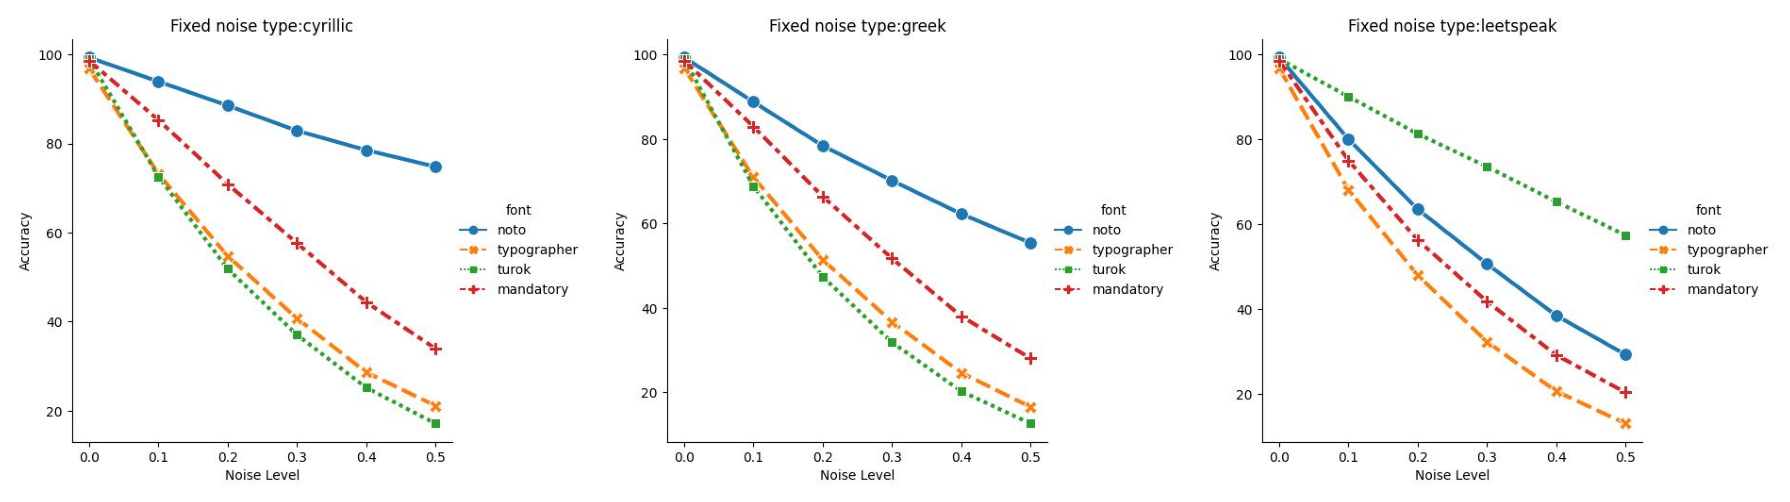

In [11]:
# List of JPG files in the specified directory
file_names = ["cyrillic.jpg", "greek.jpg", "leetspeak.jpg"]  # Replace with your actual file names

# Create a figure with 1 row and 3 columns of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Iterate over each file and create a subplot with the image
for ax, file_name in zip(axes, file_names):
    # Load the image file
    img = Image.open(f"./plots/noise_type_fixed/{file_name}")
    ax.imshow(img)
    ax.axis('off')  # Turn off the axes

# Adjust spacing between subplots
plt.tight_layout()
plt.savefig("./plots/noise_type_fixed/subgraphs")
# Show the subplots
plt.show()

### font fixed

In [ ]:
def plot_font_fixed(dataset):
    g = sns.relplot(
        x='noise_level', y='accuracy', data=dataset,
        hue='noise_type', kind='line', markers=True,
        err_style='bars', style='noise_type', linewidth=3,
        markersize=10, err_kws={'elinewidth': 4}
    )
    g.set_ylabels('Accuracy')
    g.set_xlabels('Noise Level')
    g.set(title='Fixed font:'+ dataset.name)

    # Save the plot to the specified file path
    g.savefig("./plots/font_fixed/" + dataset.name + ".jpg")
    plt.close('all')
    
# g = sns.relplot(x='noise_level', y='accuracy', data=mandatory, hue='noise_type',
#                 kind='line',errorbar=('ci', 95), markers=True,  err_style='bars',
#                 style='noise_type', linewidth = 3, markersize=10, err_kws={'elinewidth':4})
# g.set_ylabels('Accuracy')
# g.set_xlabels('Noise Level')
# g.set(title='mandatory')

In [ ]:
plot_font_fixed(noto)
plot_font_fixed(typographer)
plot_font_fixed(turok)
plot_font_fixed(mandatory)

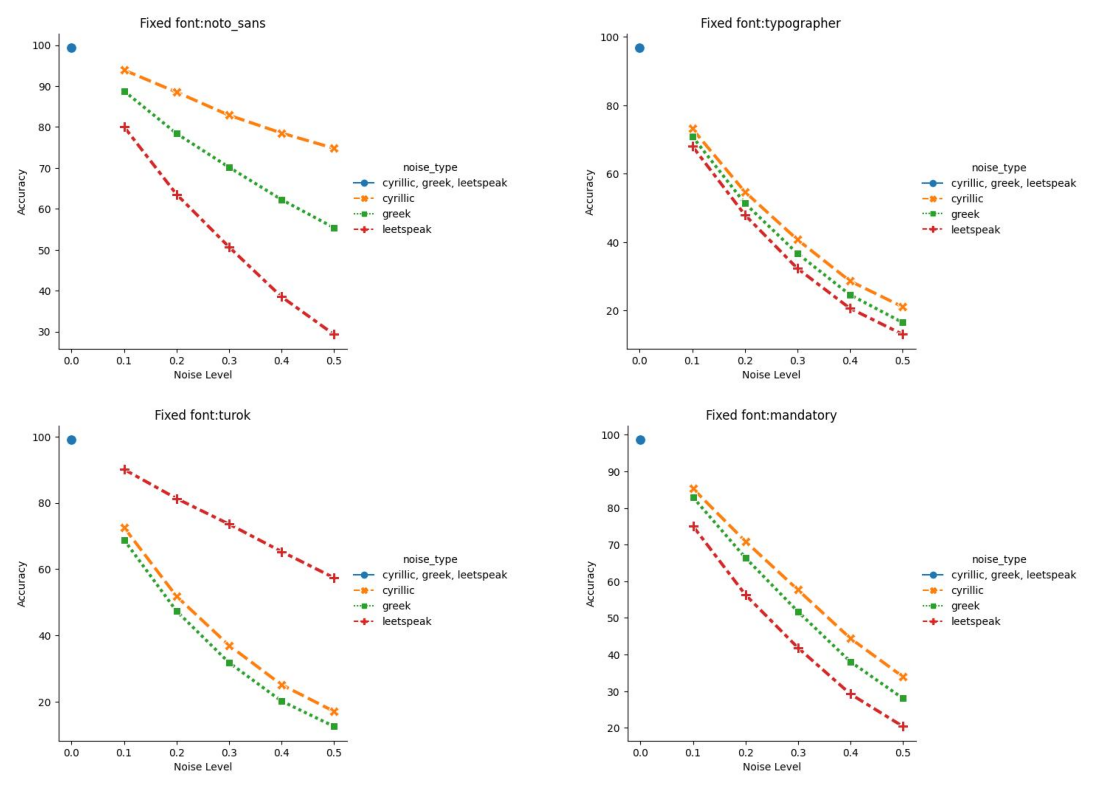

In [12]:
# Directory containing the individual JPG files
input_folder = "./plots/font_fixed/"  # Replace with your folder path

# List of JPG files in the specified directory
file_names = ["noto_sans.jpg", "typographer.jpg", "turok.jpg", "mandatory.jpg"]  # Replace with your actual file names

# Determine the number of subplots
num_subplots = min(len(file_names), 4)  # Ensure there are no more than 4 subplots

# Create a figure with 2 rows and 2 columns of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Flatten the axes array to iterate over it in a linear fashion
flat_axes = axes.flatten()

# Iterate over each file and create a subplot with the image
for i, file_name in enumerate(file_names[:num_subplots]):
    if os.path.exists(os.path.join(input_folder, file_name)):
        # Load the image file
        img = Image.open(os.path.join(input_folder, file_name))
        ax = flat_axes[i]
        ax.imshow(img)
        ax.axis("off")  # Turn off the axes

# Adjust spacing between subplots
plt.tight_layout()

# Save the subplots as a single image file in the input_folder
output_path = os.path.join(input_folder, "combined_subplots.jpg")
plt.savefig(output_path)

# Show the subplots
plt.show()

### Compare different noise levels and fonts

In [ ]:
g = sns.relplot(x='font', y='accuracy', data=df, hue='noise_level',
                kind='line',errorbar=('ci', 55), markers=True,  err_style='bars',
                style='noise_level', linewidth = 2, markersize=10, err_kws={'elinewidth':4})
g.set_ylabels('Accuracy')
g.set_xlabels('Font')
g.set(title='Compare different noise levels and fonts')
g.set(ylim = (0, 100))
g.savefig("./plots/diff_noiselevels&fonts.jpg")

# Statistical analysis

### ANOVA
If we want to compare the means of more than 2 groups, we need to perform an Analysis of Variance (ANOVA). The null-hypothesis in the ANOVA states that there is no difference between the means of the groups. A p-value less than 0.05 (at 95 %) rejects this general hypothesis without indicating which groups are different from one another.

In [ ]:
import scipy
# for an ANOVA we need the python module statsmodels (statistical models)
import statsmodels.api as sm  

# the particular function we need is called ols()
# (ols: ordinary least squares, that is the type of fitting)
from statsmodels.formula.api import ols   

In [ ]:
# we need to set up a 'formula' for the model. This formula is similar to the syntax in R.

# on the left side of the tilde we put the dependent variable
# on the right side of the tilde we state the independent variables 
# the C( )  indicates that we consider the variable as a categorical variable (and not continuous)
# the sign + is not a sum, it is to indicate more than one variable.
# the sign * is not a multiplication, it is to indicate we want to also model interactions between the variables

# we call ols() passing the model 'formula'
mod = ols('accuracy ~ C(font) + C(noise_type) + C(noise_level)',data=df)

# we fit the model
fit = mod.fit()

# we show the ANOVA table
sm.stats.anova_lm(fit)

The ANOVA table shows that for both variables k and g there is a signifficant effect (p-values < 0.05 for 95 % confidence). There is also a signifficant interaction term ('C(k):C(g)').

So the results show that all three variables will have a significant effect on the prediction results.